In [3]:
from pathlib import Path
import numpy as np
from scipy.stats import ttest_ind
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data with relative path
script_dir = Path.cwd()
data_file = script_dir.parent / "data/processed_data_tigers.csv"
data = pd.read_csv(data_file)

# exlude all columns that are not numerical
data = data.select_dtypes(include=[np.number])
print(data.columns)

Index(['matchday_no', 'opponent_table_position', 'away_game', 'overtime',
       'tigers_win', 'opponent_points', 'tigers_points',
       'opponent_points_1st_quarter', 'tigers_points_1st_quarter',
       'opponent_points_2nd_quarter', 'tigers_points_2nd_quarter',
       'opponent_points_3rd_quarter', 'tigers_points_3rd_quarter',
       'opponent_points_4th_quarter', 'tigers_points_4th_quarter',
       'total_amount_fans', 'arena_occupancy', 'field_goals_attempted',
       'field_goals_made', '2_pointer_percentage', '3_pointer_percentage',
       'free_throw_percentage', 'rebounds', 'assists', 'turnovers', 'steals',
       'fouls', 'jackson_minutes_played', 'jackson_points', 'jackson_assists',
       'rest_days'],
      dtype='object')


In [13]:
print("H0: Jackson's performance is the same in games that the Tigers win and lose")

features = ["jackson_points", "jackson_assists", "jackson_minutes_played"]

for feature in features:
    win_group = data[data["tigers_win"] == 1][feature]
    lose_group = data[data["tigers_win"] == 0][feature]
    
    t_stat, p_value = ttest_ind(win_group, lose_group, equal_var=False) 
    print(f" T-statistic: {t_stat}, P-value: {p_value}")

print("We since all p-values are above 0.05, we cannot reject the null hypothesis. This means we could not show that Jackson's performance is different in games that the Tigers win and lose.")


H0: Jackson's performance is the same in games that the Tigers win and lose
 T-statistic: 0.7904878608479605, P-value: 0.45389696962950143
 T-statistic: -0.5342036735293451, P-value: 0.6065684631946515
 T-statistic: 0.44189959240008003, P-value: 0.6715491099294374
We since all p-values are above 0.05, we cannot reject the null hypothesis. This means we could not show that Jackson's performance is different in games that the Tigers win and lose.


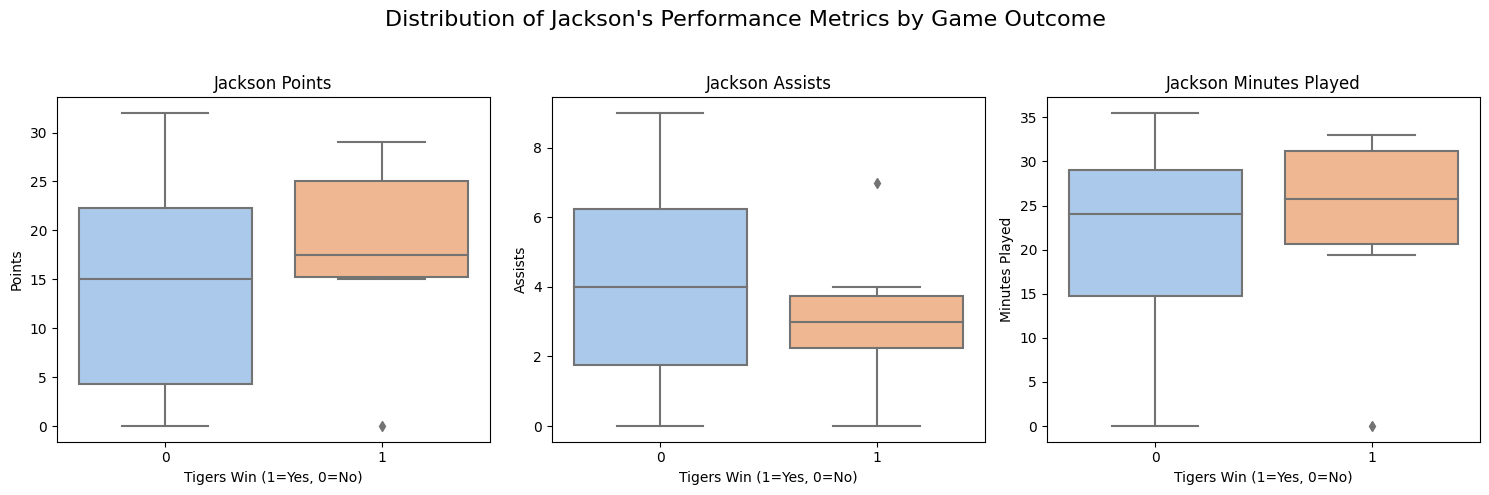

In [14]:
# Create boxplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle("Distribution of Jackson's Performance Metrics by Game Outcome", fontsize=16)

# Boxplot for jackson_points
sns.boxplot(x="tigers_win", y="jackson_points", data=data, ax=axes[0], palette="pastel")
axes[0].set_title("Jackson Points")
axes[0].set_xlabel("Tigers Win (1=Yes, 0=No)")
axes[0].set_ylabel("Points")

# Boxplot for jackson_assists
sns.boxplot(x="tigers_win", y="jackson_assists", data=data, ax=axes[1], palette="pastel")
axes[1].set_title("Jackson Assists")
axes[1].set_xlabel("Tigers Win (1=Yes, 0=No)")
axes[1].set_ylabel("Assists")

# Boxplot for jackson_minutes_played
sns.boxplot(x="tigers_win", y="jackson_minutes_played", data=data, ax=axes[2], palette="pastel")
axes[2].set_title("Jackson Minutes Played")
axes[2].set_xlabel("Tigers Win (1=Yes, 0=No)")
axes[2].set_ylabel("Minutes Played")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


/tmp/ipykernel_27565/587144982.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])
/tmp/ipykernel_27565/587144982.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])
/tmp/ipykernel_27565/587144982.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])


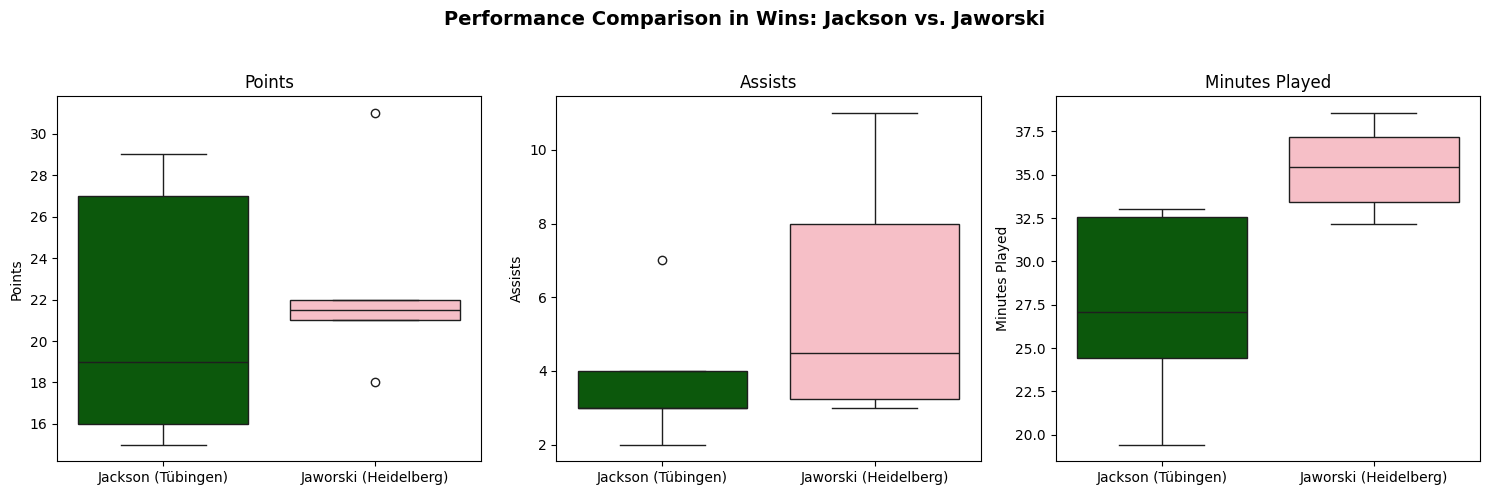

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# Load data with relative path
script_dir = Path.cwd()
data_file_tigers = script_dir.parent / "data/processed_data_tigers.csv"
data_file_heidelberg = script_dir.parent / "data/processed_data_heidelberg.csv"

data_tigers = pd.read_csv(data_file_tigers)
data_heidelberg = pd.read_csv(data_file_heidelberg)

# Filter data for games won by both teams
data_tigers_won = data_tigers[(data_tigers["tigers_win"] == 1) & (data_tigers["jackson_minutes_played"] > 0)]
data_heidelberg_won = data_heidelberg[(data_heidelberg["heidelberg_win"] == 1) & (data_heidelberg["jaworski_minutes_played"] > 0)]

# Create subplots for compact view
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle("Performance Comparison in Wins: Jackson vs. Jaworski", fontsize=14, fontweight="bold")

# Define colors
colors = ["#006400","#FFB6C1"]  # Light Pink, Dark Green

# Boxplot for Points
sns.boxplot(data=[data_tigers_won["jackson_points"], data_heidelberg_won["jaworski_points"]], palette=colors, ax=axes[0])
axes[0].set_title("Points")
axes[0].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])
axes[0].set_ylabel("Points")

# Boxplot for Assists
sns.boxplot(data=[data_tigers_won["jackson_assists"], data_heidelberg_won["jaworski_assists"]], palette=colors, ax=axes[1])
axes[1].set_title("Assists")
axes[1].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])
axes[1].set_ylabel("Assists")

# Boxplot for Minutes Played
sns.boxplot(data=[data_tigers_won["jackson_minutes_played"], data_heidelberg_won["jaworski_minutes_played"]], palette=colors, ax=axes[2])
axes[2].set_title("Minutes Played")
axes[2].set_xticklabels(["Jackson (Tübingen)", "Jaworski (Heidelberg)"])
axes[2].set_ylabel("Minutes Played")

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('plots/top_performer_diff.pdf', bbox_inches='tight')
plt.show()
